# Lending Environment Simulation & Lender Evaluation Tool

# Processed Data Exploration

In [12]:
import glob
import os
import numpy as np
import pandas as pd
from kasi.processing import data_processor as pc
from kasi.processing import dictionaries as dc
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
plt.rcParams.update({'font.size': 14})


input_path = "../../data/processed/clean_data.csv"
paths = glob.glob(input_path)
len(paths)

1

## Data Stats

In [13]:
df = pd.read_csv(input_path)
df.describe()

,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,credit_score,credit_score_category,lender_score,lender_score_category
count,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000
mean,1.690195,2.068577,1.901201,2.156791,1.799136,1.822653,1.827349,1.655821,1.988769,3.676480,3.851547,2.772556,0.241772,3.594630,2.406732,2.065786,1.930164,2.385461,3.258891,3.282000,2.796583,2.711023,2.613314,1.472756,1.514651,2.655379,2.709832,2.835994,2.895143,0.295783,1.254637,1.304768,7.680972,2.189021,348.555627,1.839193,303.795052,1.744240
std,0.617315,0.613887,0.642582,0.604722,0.637219,0.630624,0.639422,0.475108,0.866650,1.173799,1.273535,1.195637,0.709064,1.928038,0.898727,0.753135,0.612274,0.968152,1.318173,1.317576,1.159101,1.099088,1.377129,0.499266,0.499794,1.058663,1.103981,1.125394,1.220304,1.083417,0.435664,0.460317,1.261708,0.584561,244.700255,0.953146,272.730673,0.818515
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-720.000000,1.000000,-590.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,8.000000,2.000000,190.000000,1.000000,140.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,0.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,8.000000,2.000000,390.000000,2.000000,380.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,5.000000,4.000000,0.000000,5.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,0.000000,2.000000,2.000000,8.000000,2.000000,540.000000,2.000000,500.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,7.000000,9.000000,10.000000,9.000000,4.000000,7.000000,4.000000,4.000000,3.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,6.000000,5.000000,5.000000,5.000000,8.000000,2.000000,2.000000,8.000000,4.000000,970.000000,5.000000,840.000000,5.000000


In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,credit_score,credit_score_category,lender_score,lender_score_category
0,6-23-2019 5:42:51,N24S64b12,1,1,1,2,1,1,1,1,5,2,2,2,1,3,2,2,3,3,3,2,3,4,3,1,2,2,4,3,2,1,2,1,3,2,550,2,480,2
1,6-23-2019 10:57:52,AC9S64a1,1,1,2,1,1,1,1,1,3,3,5,2,2,3,2,2,2,2,4,5,2,3,2,2,2,2,2,4,4,2,2,1,2,2,660,4,450,2
2,6-23-2019 11:59:37,D16S64a26,2,2,2,2,2,2,2,2,2,2,9,5,2,3,2,2,2,2,2,2,2,3,3,1,2,2,2,2,2,0,2,1,2,2,540,2,610,3
3,6-23-2019 20:40:41,AC9S64a2,2,1,3,1,3,2,2,2,2,6,5,4,2,3,2,2,1,2,3,3,3,3,2,2,2,2,2,4,4,0,1,1,7,2,350,1,270,1
4,6-23-2019 20:41:27,AC9S64a3,2,1,3,2,3,2,3,2,2,5,5,3,2,3,2,1,3,3,2,3,2,3,3,2,2,2,2,4,3,0,1,1,4,2,530,2,510,2


In [15]:
df.shape

(29383, 40)

In [16]:
dt = df.iloc[:,2:36]  #do not include date and location
# country name
dt['16'] = [dc.category_col16[item] for item in df['16']] 
# DEMOGRAPHIC DATA
# gender
dt['9'] = [dc.category_col9[item] for item in df['9']] 
# age
dt['11'] = [dc.category_col11[item] for item in df['11']] 
# occupation
dt['13'] = [dc.category_col13[item] for item in df['13']] 
# education
dt['12'] = [dc.category_col12[item] for item in df['12']] 
# marital status
dt['10'] = [dc.category_col10[item] for item in df['10']] 
# SENTIMENT
# how easy it is to find a job
dt['2'] = [dc.category_col2[item] for item in df['2']] 
# big ticket item spending
dt['4'] = [dc.category_col4[item] for item in df['4']]
# meeting regular expenses demand
dt['5'] = [dc.category_col3_5[item] for item in df['5']] 
# economic condition change over next 6 month
dt['8'] = [dc.category_col6_7_8[item] for item in df['8']] 
# SPENDING & BORROWING
# lending amount
dt['19'] = [dc.category_col19[item] for item in df['19']] 
# is interested paid
dt['22'] = [dc.category_col22_23_24[item] for item in df['22']] 
# spending pattern
dt['26'] = [dc.category_col26[item] for item in df['26']] 
# debt payment per month as a % of total income
dt['36'] = [dc.category_col36[item] for item in df['36']] 
dt.head()


,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,Difficult,1,More,Maybe,1,1,Improve,Female,"Separated, but not divorced",18-24,"High school, no diploma",Salaried employee,1,Ghana,2,Small,3,3,About half the time,2,3,4,"To invest or cover business expenses (Merchandise, salaries, etc..)",1,2,2,4,3,2,1,2,1,10% - 20%,2
1,Difficult,1,Same,No,1,1,Improve,Female,Dating,25-29,Bachelor’s degree,Salaried employee,2,Ghana,2,Small,2,2,Occasionally,5,2,3,"To pay for one-time or sudden expenses (Wedding, medical emergencies, etc.)",2,2,2,2,4,4,2,2,1,5% -10%,2
2,Same,2,Same,Maybe,2,2,Stay the same,Male,Married,18-24,Currently studying,Unemployed,2,Ghana,2,Small,2,2,Most of the time,2,2,3,"To invest or cover business expenses (Merchandise, salaries, etc..)",1,2,2,2,2,2,0,2,1,5% -10%,2
3,Same,1,Less,No,3,2,Stay the same,Male,Married,40-44,Bachelor’s degree,Business owner,2,Ghana,2,Small,1,2,About half the time,3,3,3,"To pay for one-time or sudden expenses (Wedding, medical emergencies, etc.)",2,2,2,2,4,4,0,1,1,More than half of my income goes to pay off rent,2
4,Same,1,Less,Maybe,3,2,Worsen,Male,Married,35-39,Bachelor’s degree,Commission-based employee,2,Ghana,2,Micro,3,3,Most of the time,3,2,3,"To invest or cover business expenses (Merchandise, salaries, etc..)",2,2,2,2,4,3,0,1,1,20% - 30%,2


### Demographic Stats

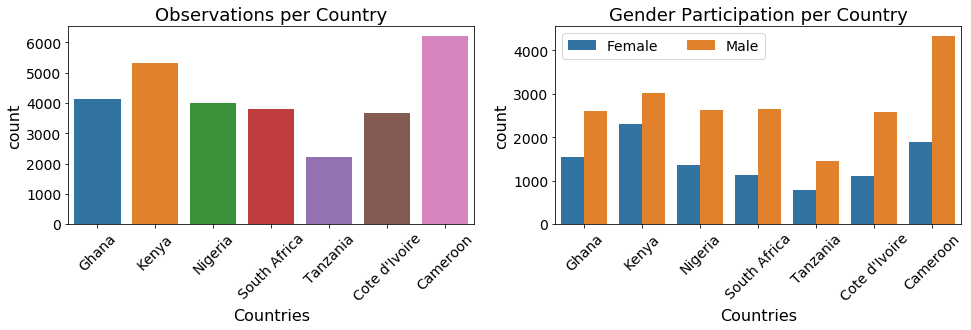

In [17]:
fig = plt.figure(figsize=(16, 8))
h= 2
w = 2
plt.subplot(h, w, 1)
plt.title('Observations per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16']);
_= fig.set(xlabel='Countries')
plt.subplot(h, w, 2)
plt.title('Gender Participation per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['9']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=2, loc="upper left", frameon=True)


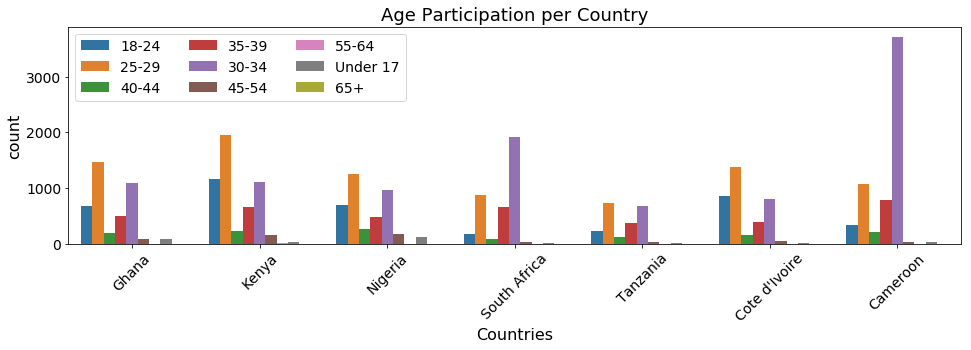

In [18]:
plt.figure(figsize=(16,4))
plt.title('Age Participation per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['11']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

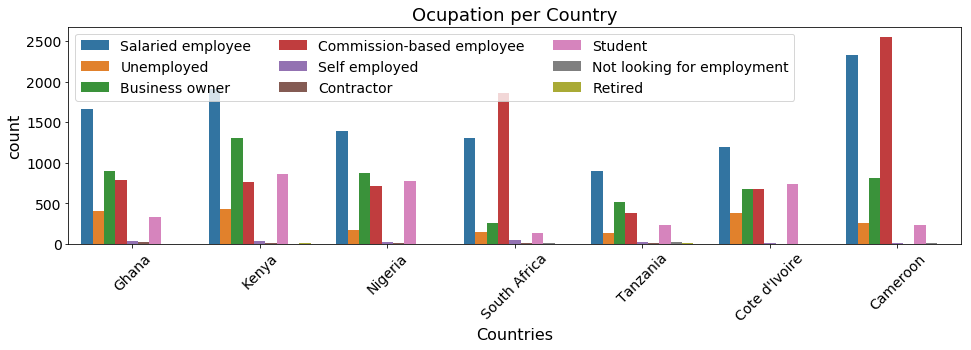

In [19]:
plt.figure(figsize=(16,4))
plt.title('Ocupation per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['13']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

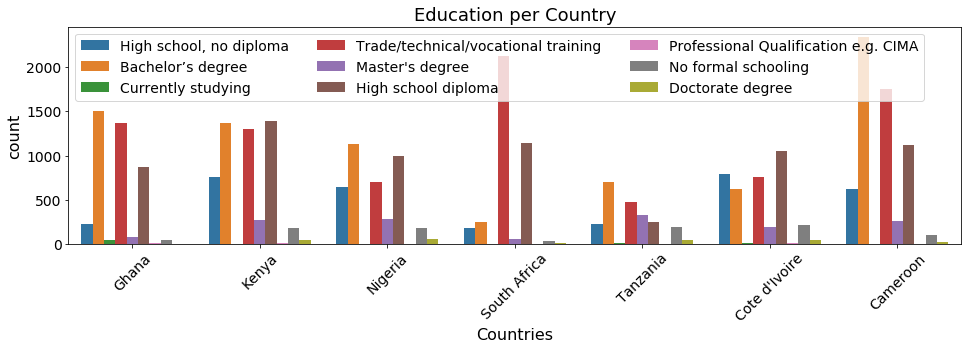

In [20]:
plt.figure(figsize=(16,4))
plt.title('Education per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['12']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

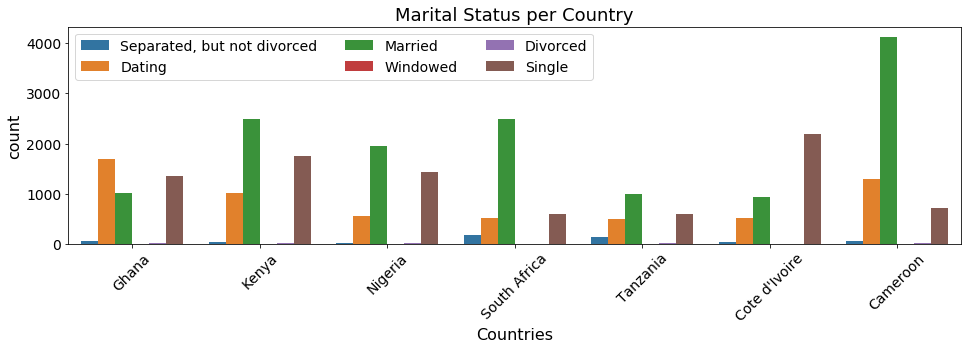

In [21]:
plt.figure(figsize=(16,4))
plt.title('Marital Status per Country', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['10']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

### Economic Sentiment

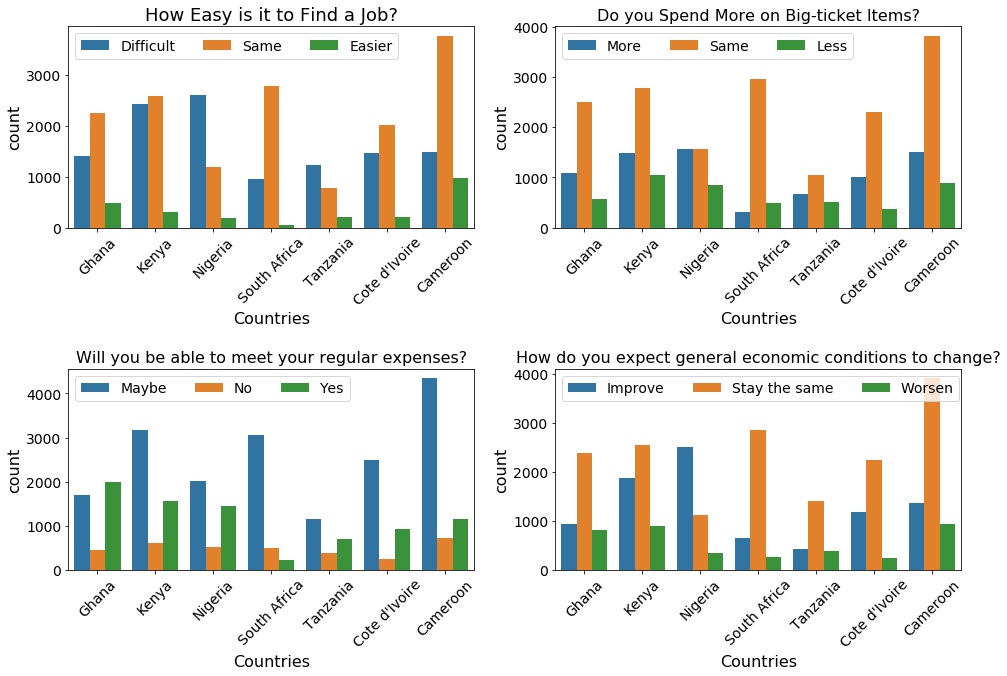

In [31]:
fig = plt.figure(figsize=(16, 10))
h= 2
w = 2
plt.subplot(h, w, 1)
plt.title('How Easy is it to Find a Job?', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['2']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

plt.subplot(h, w, 2)
plt.title('Do you Spend More on Big-ticket Items?', fontsize=16)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['4']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

plt.subplot(h, w, 3)
plt.title('Will you be able to meet your regular expenses?', fontsize=16)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['5']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)
plt.subplots_adjust(hspace=0.5)

plt.subplot(h, w, 4)
plt.title('How do you expect general economic conditions to change?', fontsize=16)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['8']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)
plt.subplots_adjust(hspace=0.7)

### Spending and Borrowing Habits

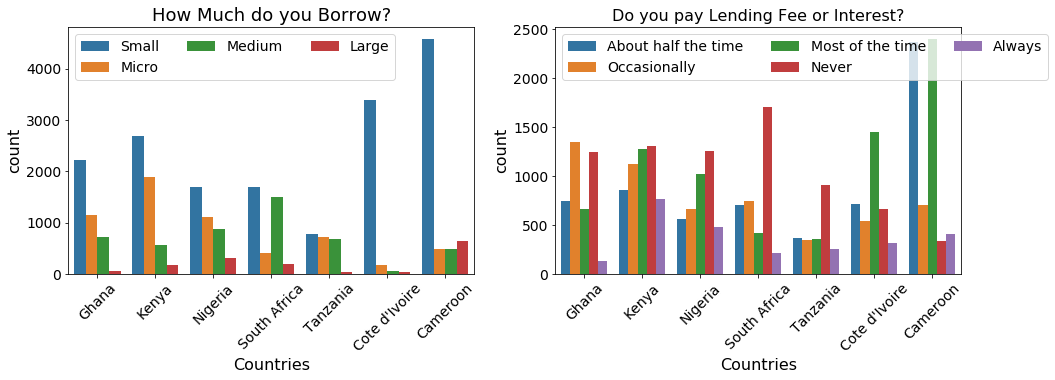

In [23]:
fig = plt.figure(figsize=(16, 10))
h= 2
w = 2
plt.subplot(h, w, 1)
plt.title('How Much do you Borrow?', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['19']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

plt.subplot(h, w, 2)
plt.title('Do you pay Lending Fee or Interest?', fontsize=16)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['22']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)



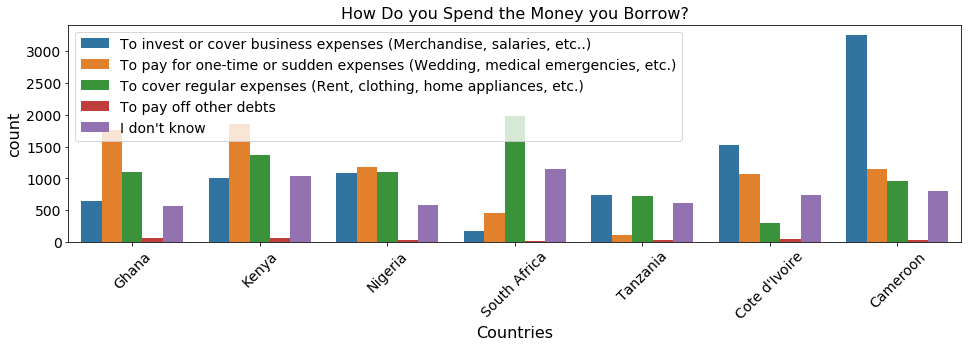

In [24]:
plt.figure(figsize=(16,4))
plt.title('How Do you Spend the Money you Borrow?', fontsize=16)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['26']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=1, loc="upper left", frameon=True)

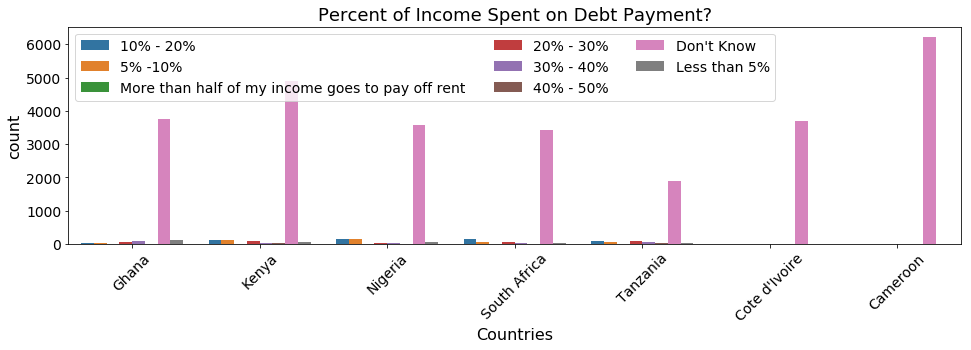

In [25]:
plt.figure(figsize=(16,4))
plt.title('Percent of Income Spent on Debt Payment?', fontsize=18)
plt.ylabel("",fontsize=16)
plt.xlabel("",fontsize=16)
plt.xticks(rotation=45)
fig = sns.countplot(x=dt['16'], hue=dt['36']);
_= fig.set(xlabel='Countries')
_ =fig.legend(ncol=3, loc="upper left", frameon=True)

### Lending Environment

In [26]:
cameroon = df[df['16'] == 1]
cote = df[df['16'] == 2]
ghana = df[df['16'] == 3]
kenya = df[df['16'] == 4]
nigeria = df[df['16'] == 5]
south_africa = df[df['16'] == 6]
tanzania = df[df['16'] == 7]

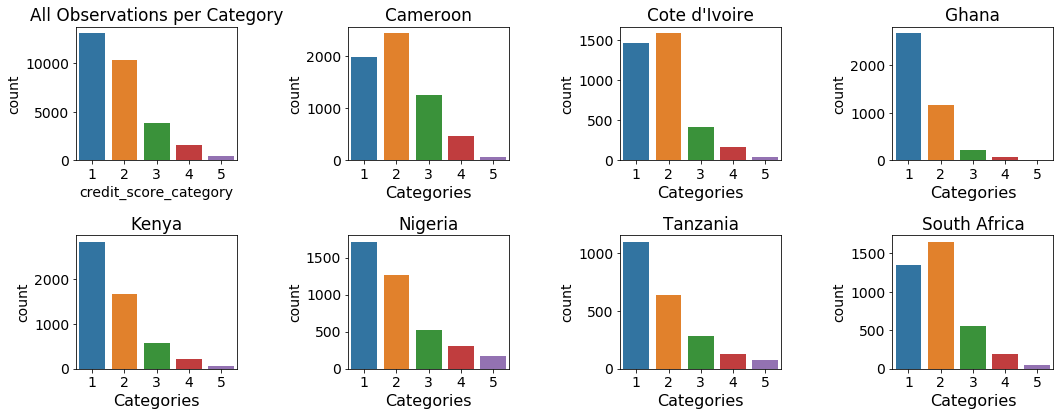

In [37]:
fig = plt.figure(figsize=(15, 6))
h= 2
w = 4
plt.subplot(h, w, 1)
plt.title('All Observations per Category')
sns.countplot(x=df['credit_score_category']);

plt.subplot(h, w, 2)
_ = sns.countplot(x=cameroon['credit_score_category']);
_ = plt.title("Cameroon")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 3)
_ = sns.countplot(x=cote['credit_score_category']);
_ = plt.title("Cote d'Ivoire")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 4)
_ = sns.countplot(x=ghana['credit_score_category']);
_ = plt.title("Ghana")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 5)
_ = sns.countplot(x=kenya['credit_score_category']);
_ = plt.title("Kenya")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 6)
_ = sns.countplot(x=nigeria['credit_score_category']);
_ = plt.title("Nigeria")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 7)
_ = sns.countplot(x=tanzania['credit_score_category']);
_ = plt.title("Tanzania")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 8)
_ = sns.countplot(x=south_africa['credit_score_category']);
_ = plt.title("South Africa")
plt.xlabel('Categories', fontsize=16)
plt.tight_layout()

### Lender Evaluation

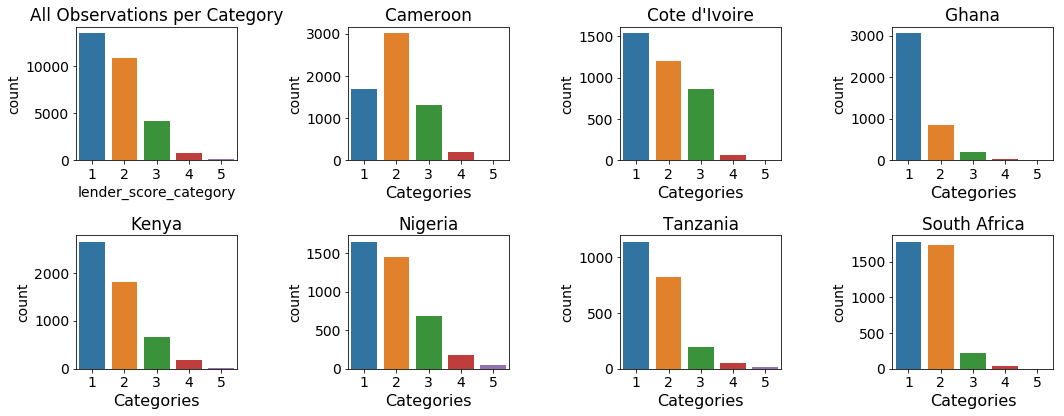

In [38]:
fig = plt.figure(figsize=(15, 6))
h= 2
w = 4
plt.subplot(h, w, 1)
plt.title('All Observations per Category')
sns.countplot(x=df['lender_score_category']);

plt.subplot(h, w, 2)
_ = sns.countplot(x=cameroon['lender_score_category']);
_ = plt.title("Cameroon")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 3)
_ = sns.countplot(x=cote['lender_score_category']);
_ = plt.title("Cote d'Ivoire")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 4)
_ = sns.countplot(x=ghana['lender_score_category']);
_ = plt.title("Ghana")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 5)
_ = sns.countplot(x=kenya['lender_score_category']);
_ = plt.title("Kenya")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 6)
_ = sns.countplot(x=nigeria['lender_score_category']);
_ = plt.title("Nigeria")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 7)
_ = sns.countplot(x=tanzania['lender_score_category']);
_ = plt.title("Tanzania")
plt.xlabel('Categories', fontsize=16)
plt.subplot(h, w, 8)
_ = sns.countplot(x=south_africa['lender_score_category']);
_ = plt.title("South Africa")
plt.xlabel('Categories', fontsize=16)
plt.tight_layout()

In [29]:
negative_score = df[df['credit_score'] <0]
negative_score.shape[0]/df.shape[0]


0.1022359867950856

In [30]:
negative_score = df[df['lender_score'] <0]
negative_score.shape[0]/df.shape[0]

0.1555661436885274